## Creating a base level notebook to implement what I learn from the IBM Capstone Project.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e7/sample_submission.csv
/kaggle/input/playground-series-s5e7/train.csv
/kaggle/input/playground-series-s5e7/test.csv


In [2]:
train = pd.read_csv('/kaggle/input/playground-series-s5e7/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s5e7/test.csv')

In [3]:
train.drop('id', axis=1, inplace=True)
test.drop('id', axis=1, inplace=True)

In [4]:
train.shape

(18524, 8)

In [5]:
test.shape

(6175, 7)

In [6]:
train.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


In [7]:
train['Personality'].value_counts()

Personality
Extrovert    13699
Introvert     4825
Name: count, dtype: int64

In [8]:
train.dtypes

Time_spent_Alone             float64
Stage_fear                    object
Social_event_attendance      float64
Going_outside                float64
Drained_after_socializing     object
Friends_circle_size          float64
Post_frequency               float64
Personality                   object
dtype: object

In [9]:
train.isnull().sum()

Time_spent_Alone             1190
Stage_fear                   1893
Social_event_attendance      1180
Going_outside                1466
Drained_after_socializing    1149
Friends_circle_size          1054
Post_frequency               1264
Personality                     0
dtype: int64

In [10]:
test.isnull().sum()

Time_spent_Alone             425
Stage_fear                   598
Social_event_attendance      397
Going_outside                466
Drained_after_socializing    432
Friends_circle_size          350
Post_frequency               408
dtype: int64

In [11]:
def preprocess(df):
    
    df['Stage_fear'] = df['Stage_fear'].fillna('Unknown').map({'Yes': 1, 'No': 0, 'Unknown': -1})
    df['Drained_after_socializing'] = df['Drained_after_socializing'].fillna('Unknown').map({'Yes': 1, 'No': 0, 'Unknown': -1})
    num_cols = test.select_dtypes(exclude='object').columns.to_list()
    impute = SimpleImputer(strategy='median')
    df[num_cols] = impute.fit_transform(df[num_cols])

    return df

train = preprocess(train)
test = preprocess(test)

In [12]:
train['Personality'] = train['Personality'].map({'Extrovert': 1, 'Introvert': 0})

In [13]:
train.shape

(18524, 8)

In [14]:
test.shape


(6175, 7)

In [15]:
train.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0.0,0,6.0,4.0,0,15.0,5.0,1
1,1.0,0,7.0,3.0,0,10.0,8.0,1
2,6.0,1,1.0,0.0,-1,3.0,0.0,0
3,3.0,0,7.0,3.0,0,11.0,5.0,1
4,1.0,0,4.0,4.0,0,13.0,5.0,1


In [16]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

In [17]:
train.describe()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
count,18524.000000,18524.000000,18524.000000,18524.000000,18524.000000,18524.000000,18524.000000,18524.000000
mean,3.064673,0.114932,5.248219,4.040812,0.157255,7.996923,4.983319,0.739527
std,2.919057,0.553284,2.665002,1.979312,0.506552,4.101561,2.779172,0.438905
min,0.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,3.000000,3.000000,0.000000,5.000000,3.000000,0.000000
50%,2.000000,0.000000,5.000000,4.000000,0.000000,8.000000,5.000000,1.000000
75%,4.000000,0.000000,7.000000,6.000000,0.000000,11.000000,7.000000,1.000000
max,11.000000,1.000000,10.000000,7.000000,1.000000,15.000000,10.000000,1.000000


<Axes: xlabel='Time_spent_Alone'>

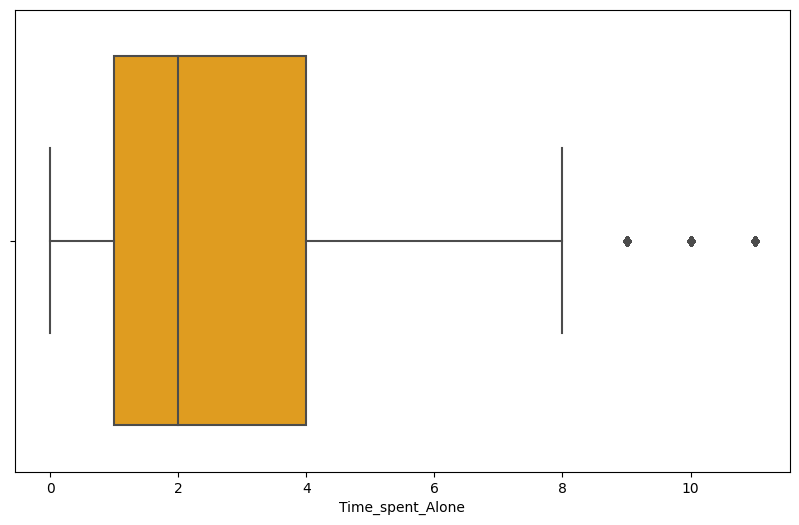

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Time_spent_Alone', data=train, color='orange')

In [19]:
X = train.copy()
y = X.pop('Personality')

In [20]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=2)

In [21]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    plt.figure(figsize=(10, 6))
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, fmt='d', ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['Introvert', 'Extrovert']); ax.yaxis.set_ticklabels(['Introvert', 'Extrovert']) 
    plt.show() 

In [22]:
cv = StratifiedKFold(n_splits=15, random_state=2, shuffle=True)

## Logistic Regression

In [23]:
parameters ={"C":[0.01,0.1,1],'penalty':['l1'], 'solver':['saga']}# l1 lasso l2 ridge
lr=LogisticRegression(max_iter=2000, random_state=2)

logreg_cv = GridSearchCV(lr, param_grid=parameters, cv=cv, scoring='accuracy')
logreg_cv.fit(X_train, y_train)


GridSearchCV(cv=StratifiedKFold(n_splits=15, random_state=2, shuffle=True),
             estimator=LogisticRegression(max_iter=2000, random_state=2),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l1'],
                         'solver': ['saga']},
             scoring='accuracy')

In [24]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :", logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
accuracy : 0.967752560377694


In [25]:
accuracy_lr = logreg_cv.score(X_valid, y_valid)
print(accuracy_lr)

0.9691211401425178


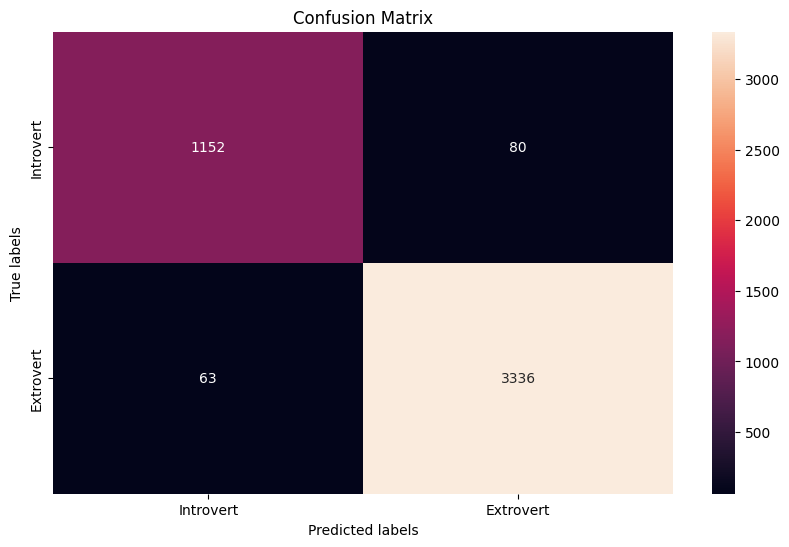

In [26]:
yhat = logreg_cv.predict(X_valid)
plot_confusion_matrix(y_valid, yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the problem is false positives.

Overview:


**True Postive - 3336 (True label is Extrovert, Predicted label is also extrovert)False Postive - 80 (True label is Introvert, Predicted label is introvert)**


In [27]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'min_samples_leaf': [1, 2, 3, 4, 5],
     'min_samples_split': [2, 3, 4, 5, 6]}

tree = DecisionTreeClassifier(random_state=2)

In [28]:
tree_cv = GridSearchCV(tree, param_grid=parameters, cv=cv, scoring='accuracy')
tree_cv.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=15, random_state=2, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=2),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5, 6],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [29]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
accuracy : 0.9681842151656993


In [30]:
accuracy_tree = tree_cv.score(X_valid, y_valid)
print(accuracy_tree)

0.9695530123083568


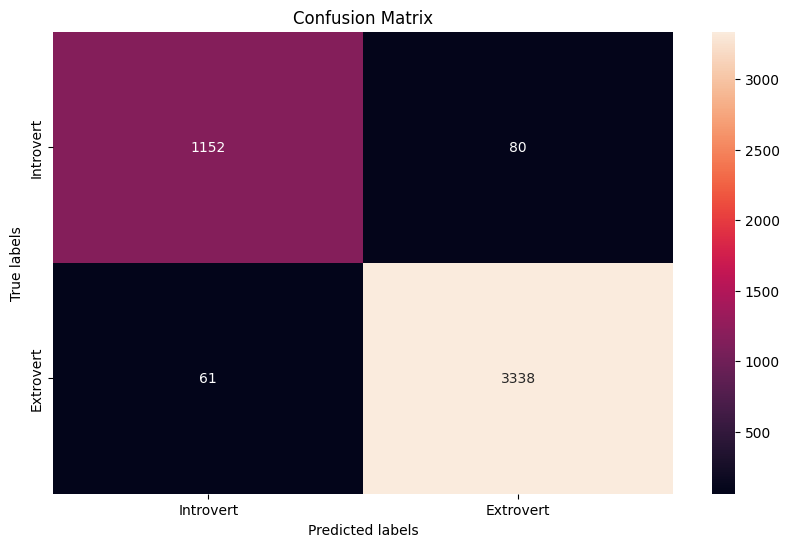

In [31]:
yhat_tree = tree_cv.predict(X_valid)
plot_confusion_matrix(y_valid, yhat_tree)

In [32]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1, 2]}

KNN = KNeighborsClassifier()

In [33]:
knn_cv = GridSearchCV(KNN, param_grid=parameters, cv=cv, scoring='accuracy')
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=15, random_state=2, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]},
             scoring='accuracy')

In [34]:
print("tuned hpyerparameters :(best parameters) ", knn_cv.best_params_)
print("Accuracy :", knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'ball_tree', 'n_neighbors': 8, 'p': 1}
Accuracy : 0.9682562094061601


In [35]:
accuracy_knn = knn_cv.score(X_valid, y_valid)
print("Test set score: {:.6f}".format(accuracy_knn))

Test set score: 0.970201


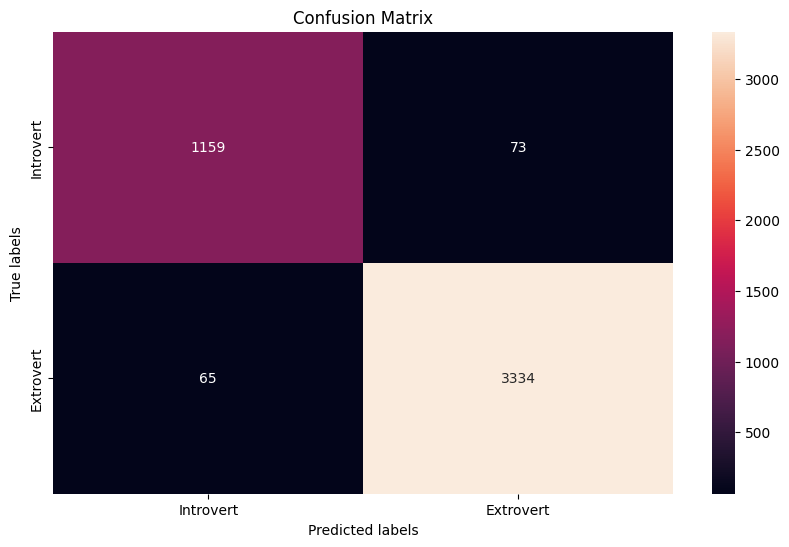

In [36]:
yhat_knn = knn_cv.predict(X_valid)
plot_confusion_matrix(y_valid, yhat_knn)

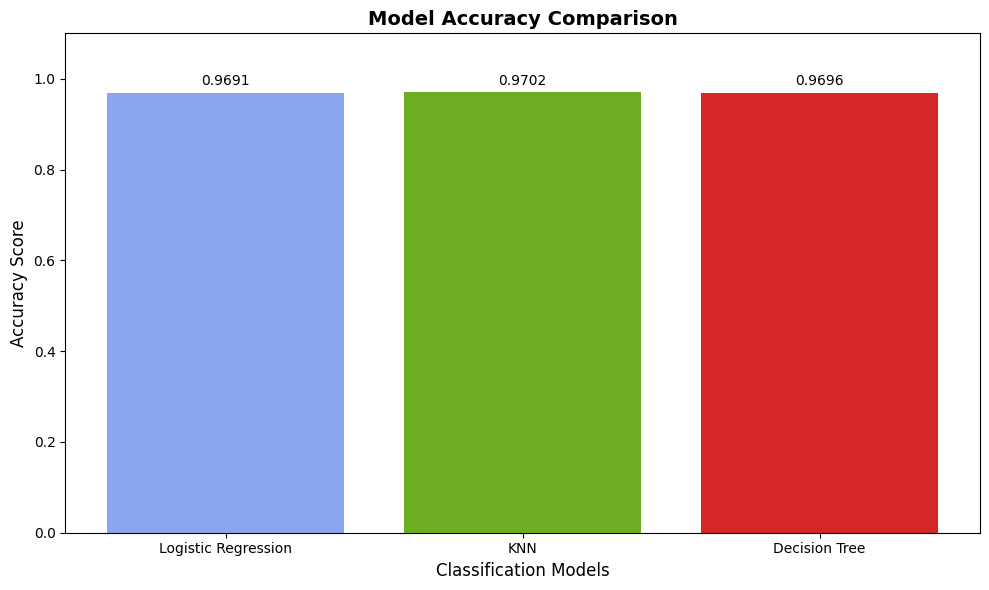

In [37]:
models_accuracy = {
    'Logistic Regression': accuracy_lr,
    'KNN': accuracy_knn,
    'Decision Tree': accuracy_tree
}

plt.figure(figsize=(10, 6))
models = list(models_accuracy.keys())
accuracies = list(models_accuracy.values())

# Create bars with colors
bars = plt.bar(models, accuracies, color=["#1851e182", '#6cad21', '#d62728'])

# Add accuracy values on top of each bar
for i, (model, acc) in enumerate(zip(models, accuracies)):
    plt.text(i, acc + 0.01, f'{acc:.4f}', ha='center', va='bottom', fontsize=10)


plt.xlabel('Classification Models', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)
plt.title('Model Accuracy Comparison', fontsize=14, fontweight='bold')
plt.ylim(0, 1.1) 
plt.tight_layout()

plt.show()


As we can see from the bar chart above, KNN is the best performing model on the test data.

In [38]:
X_test = test.copy()

In [39]:
knn_test = knn_cv.predict_proba(X_test)
final_preds = np.argmax(knn_test, axis=1)
final_preds = pd.Series(final_preds)

In [40]:
knn_test = final_preds.map({1: 'Extrovert', 0: 'Introvert'})

In [41]:
sub = pd.read_csv('/kaggle/input/playground-series-s5e7/sample_submission.csv')
sub['Personality'] = knn_test
sub.to_csv('submission.csv', index=False)
print("Submission file saved as submission.csv")
sub.head()

Submission file saved as submission.csv


,id,Personality
0,18524,Extrovert
1,18525,Introvert
2,18526,Extrovert
3,18527,Extrovert
4,18528,Introvert
